Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Yifei Fan"
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Interpolation and applications

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** Analytically find coefficients of the interpolating  polynomial $P_2(x)$ that passes through these three points in the following bases
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Lagrange: $P(x) = \sum^2_{k=0} y_k \ell_k(x)$
1. Newton: $P(x) = \sum^2_{k=0} a_k n_k(x)$ 

and show that, independent of basis it's always the same polynomial.

**Note:** we didn't discuss the Newton polynomial basis in class but they are 
 are defined by
\begin{align}
    n_0 &= 1\\
    n_j(x) &= \prod^{j-1}_{i=0} (x - x_i)\quad\mathrm{for}\quad j>0 \\
\end{align}

you will only need the first three
\begin{align}
    n_0(x) &= 1\\
    n_1(x) &= (x-x_0) \\
    n_2(x) &= (x - x_0)(x-x_1)\\
\end{align}



Monomial: $P(x)=0 + 3x-x^2$

Lagrange: $P(x)=0+2(x-0)/(1-0)(x-2)/(1-2)+2(x-0)/(2-0)(x-1)/(2-1)=3x-x^2$

Newton: $P(x)=0+4(x-0)-x(x-1)=3x-x^2$

They are the same polynomial

**(b)** Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points that for a function $f(x) = c$ with $c \in \mathbb R$ that

$$\sum^N_{i=0} \ell_i(x) = 1$$

holds for any value of $x$.


It is easy to see that the $N+1$ points interpolating by monomial basis is $P(x)=c$

By the uniqueness of the interpolating polynomial, $P(x)=\sum^N_{i=0} y_i \ell_i(x)=c$

$y_i=c$ for all i, that is $\sum^N_{i=0} \ell_i(x) = 1$

## Question 2: Fun with Chebyshev Polynomials

**(a)** The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$\omega(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

Let $x=cos(\theta)$, then $\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = \int^\pi_{0} cos(n \theta)cos(m \theta)/\sqrt{1 - cos(\theta)^2} dcos(\theta)=\int^\pi_{0} -cos(n \theta)cos(m \theta)d\theta=-0.5\int^\pi_{0} cos(n \theta+m\theta)+cos(n \theta-m\theta) d\theta= \left \{ \begin{aligned} 
-\pi/2 & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$

**(b)** Consider the  Gaussian 
$$ f(x) = e^{-x^2} $$ on the interval $x\in[-3,3]$

make a plot comparing the polynomial interpolant through $N=9$ points using 
* Evenly spaced points
* The appropriate Chebyshev nodes (i.e. roots of $T_9$)

Be sure to show both the interpolation points and a reasonably resolved interpolating polynomial $P_8(x)$, and label all lines and axes.

You can use any of the routines from the notes or `numpy.polyfit` and `numpy.polyval`.  
For fun, experiment with other functions (e.g. Runge's function $f(x) = 1/(1 + 25x^2)$)

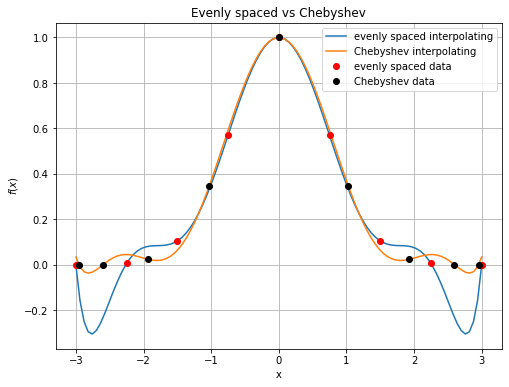

In [3]:
#evenly spaced
N1=numpy.linspace(-3,3,9)
#Chebyshev
N2=3*numpy.cos((2.0 * numpy.arange(1, 9 + 1) - 1.0) / (2.0 * 9) * numpy.pi)

y1=numpy.exp(-numpy.square(N1))
y2=numpy.exp(-numpy.square(N2))

p81=numpy.polyfit(N1,y1,8)
p82=numpy.polyfit(N2,y2,8)

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
x=numpy.linspace(-3,3,100)
axes.plot(x, numpy.polyval(p81,x), label="evenly spaced interpolating" )
axes.plot(x, numpy.polyval(p82,x), label="Chebyshev interpolating" )
axes.plot(N1, y1, 'ro', label="evenly spaced data")
axes.plot(N2, y2, 'ko', label="Chebyshev data")

axes.set_title("Evenly spaced vs Chebyshev")
axes.set_xlabel("x")
axes.set_ylabel("$f(x)$")
axes.grid()
axes.legend(loc='best')
plt.show()

**(c)** define the relative error as
        
$$
 r = \frac{||f(x) - P_N(x)||}{||f(x)||}
$$

where $||\cdot||$ is an appropriate norm (length) of a vector, in python you can calculate this by

```python
x = numpy.linspace(x_min, x_max)
P_N = numpy.polyval(p, x)

err = f(x) - P_N(x)
r = numpy.linalg.norm(err)/numpy.linalg.norm(f(x))
```

* Make a well labeled plot showing log(r) vs number of grid points $N$ for $N\in[5,30]$ 
* Comment briefly on your results. Some questions to consider are:
    *  does $P_N(x)\rightarrow f(x)$ as $N\rightarrow\infty$?
    *  Is one interpolant more accurate than the other?
    * Anything else you notice

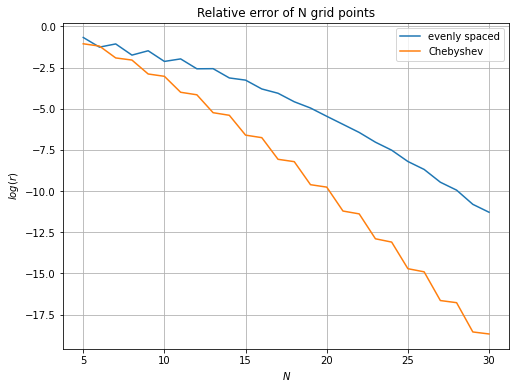

In [4]:
logr1=[]
logr2=[]
for n in range(5,31):
    #evenly spaced
    N1=numpy.linspace(-3,3,n)
    #Chebyshev
    N2=3*numpy.cos((2.0 * numpy.arange(1, n + 1) - 1.0) / (2.0 * n) * numpy.pi)
    
    y1=numpy.exp(-numpy.square(N1))
    y2=numpy.exp(-numpy.square(N2))
    
    pn1=numpy.polyfit(N1,y1,n-1)
    pn2=numpy.polyfit(N2,y2,n-1)
    
    x = numpy.linspace(-3, 3)
    P_N1 = numpy.polyval(pn1, x)
    err1 = numpy.exp(-numpy.square(x)) - P_N1
    r1 = numpy.linalg.norm(err1)/numpy.linalg.norm(numpy.exp(-numpy.square(x)))
    logr1.append(numpy.log(r1))
    
    P_N2 = numpy.polyval(pn2, x)
    err2 = numpy.exp(-numpy.square(x)) - P_N2
    r2 = numpy.linalg.norm(err2)/numpy.linalg.norm(numpy.exp(-numpy.square(x)))
    logr2.append(numpy.log(r2))
    
x=numpy.linspace(5,30,26)

fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, logr1, label="evenly spaced" )
axes.plot(x, logr2, label="Chebyshev" )

axes.set_title("Relative error of N grid points")
axes.set_xlabel("$N$")
axes.set_ylabel("$log(r)$")
axes.grid()
axes.legend(loc='best')
plt.show()
    

Error decreases as N increases for both sampling method, while Chebyshev decreases faster.
The interpolating will be the original function as $N\rightarrow\infty$. 
In this example interpolating by Chebyshev is more accurate than that by evenly spaced data points.

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.   

Here we will construct a matrix   $D$  such that multiplying a vector of $\mathbf{y}$ values would lead to a second order approximation of the First derivative for the given data. 

In other words, defining the two vectors   $\mathbf{x}=[x_0, x_1,\ldots,x_N]^T$ and $\mathbf{y}=[y_0, y_1,\ldots,y_N]^T$  such that

$$\mathbf{y} = f(\mathbf{x})$$

for some scalar function $f$,  find a matrix $D$ such that 

$$
f'(\mathbf{x}) \approx D\mathbf{y}
$$

**(a)** [12] Derive the forward, centered and  backward second order finite difference approximations to the first derivative using the method of your choice.

I.e. given 3 equispaced points $x_i, x_{i+1}, x_{i+2}$  calculate the consistent 2nd order, *1st derivative* operator evaluated at each point.  

* hint 1:  consider the interpolating polynomial $P_2(x)$ through those 3 points and calculate $P'_2(x)$ at each point.
* hint 2:  the method of undetermined coefficients on Taylor's series can be useful here as well

**Extra Credit**: Find the consistent 2nd order *2nd derivative* evaluated at each point

Let $h$ be the distance between equispaced points $x_i, x_{i+1}, x_{i+2}$
$$
P_2(x) = y_i\frac{(x-x_{i+1})(x-x_{i+2})}{(x_i-x_{i+1})(x_i-x_{i+2})} + y_{i+1}\frac{(x-x_i)(x-x_{i+2})}{(x_{i+1}-x_i)(x_{i+1}-x_{i+2})} + y_{i+2}\frac{(x-x_i)(x-x_{i+1})}{(x_{i+2}-x_i)(x_{i+2}-x_{i+1})}
$$

$$
P_2'(x) = y_i\frac{(x-x_{i+1})+(x-x_{i+2})}{(x_i-x_{i+1})(x_i-x_{i+2})} + y_{i+1}\frac{(x-x_i)+(x-x_{i+2})}{(x_{i+1}-x_i)(x_{i+1}-x_{i+2})} + y_{i+2}\frac{(x-x_i)+(x-x_{i+1})}{(x_{i+2}-x_i)(x_{i+2}-x_{i+1})}=y_i\frac{(x-x_{i+1})+(x-x_{i+2})}{2h^2} - y_{i+1}\frac{(x-x_i)+(x-x_{i+2})}{h^2} + y_{i+2}\frac{(x-x_i)+(x-x_{i+1})}{2h^2}
$$

Forward: $P_2'(x_i)=\frac{-3y_i}{2h} + \frac{2y_{i+1}}{h} + \frac{-y_{i+2}}{2h}$, centered: $P_2'(x_{i+1})=\frac{-y_i}{2h} + \frac{y_{i+2}}{2h}$ , Backward: $P_2'(x_{i+2})=\frac{y_i}{2h} - \frac{2y_{i+1}}{h} + \frac{3y_{i+2}}{2h}$

$$P_2''(x)=\frac{2y_i}{2h^2} - \frac{2y_{i+1}}{h^2} + \frac{2y_{i+2}}{2h^2}$$


**(b)** [4] Now consider an equispaced set of points  $y_i = f(x_i)$.  Can you describe the structure of a consistent 2nd order, first derivative matrix $D$,  such that 

$$
    f'(\mathbf{x}) \approx D\mathbf{y}
$$

returns the consistent 1st derivative at every point (including the end points)

$D$ is a N by N tridiagonal matrix with exceptions on the first and the last row. The first row is -3/2 2 -1/2 with all following N-3 entries to be zeros. The tridiagonal is -1/2 0 1/2. The last row is 1/2 -2, 3/2 to be the last 3 entries and the rest to be zeros.

**(c)** [4] Using the function `fdcoeffV.py` described in class (and included with this homework), write a python function that takes in a numpy array of coordinates $x$ (not necessarily evenly spaced)  and returns a matrix $D$ that calculates the consistent 2nd-order 1st derivatives at each point using 3 nearest neighbors (be careful at the edges)

Given this matrix $D$, it is easy to test it for various functions and meshes

In [5]:
from  fdcoeffV import fdcoeffV

def D1(x):
    """
    Write a good doc-string
    
    x: ndarray of coordinates
    D: ndarray
        Matrix (2-D ndarray ) to calculate consistent 2nd order first derivative
    """
    D=[]
    for i in range(len(x)):
        if i==0:
            D.append(numpy.zeros(len(x)))
            D[0,:3]=fdcoeffV(1,x[i],x[:3])
            continue
        if i==len(x):
            D.append(numpy.zeros(len(x)))
            D[i,-3:]=fdcoeffV(1,x[i],x[-3:])
            break
        D.append(numpy.zeros(len(x)))
        D[i,i-1:i+1]=fdcoeffV(1,x[i],x[i-1:i+1])
        
    print(D)
    return D
    


In [6]:
# Let's test this using f(x) = sin(pi*x) on a uniform mesh
N = 200
x = numpy.linspace(-1, 1, N)
dx = x[1]-x[0]

pi = numpy.pi
y = lambda x: numpy.sin(pi*x)
y_prime = lambda x: pi*numpy.cos(pi*x)

print("Uniform mesh: ",end='')
numpy.testing.assert_allclose(numpy.dot(D1(x), y(x)), y_prime(x), rtol=1e-2)
print("Success!")

# test on a randomized mesh
x_rand = x + dx/3.*numpy.random.rand(N)
print("Random mesh: ",end ='')
numpy.testing.assert_allclose(numpy.dot(D1(x_rand), y(x_rand)), y_prime(x_rand), rtol=1e-2)
print("Success!")



Uniform mesh: 

TypeError: list indices must be integers or slices, not tuple

**(d)** [6] make a beautiful convergence plot showing how the relative error in your finite element approximation

$$ r = \frac{||f'(\mathbf{x}) - D\mathbf{y}||}{||f'(\mathbf{x})||}$$

 scales with mesh spacing $\Delta x$ for $f(x) = \sin(\pi x)$ on the interval $x\in[-1,1]$.  What is the expected rate of convergence?  Compare with the best fit straight line (in log space) to your error estimates.

Expected rate of convergence should be N square

**(e)** [4] Suppose we knew the *first derivative* of a function $f(x)$ at a discrete set of points and wanted to solve for the discrete function itself.  i.e.  ideally given $D$ and vector $\mathbf{y} = f'(\mathbf{x})$,  we would like to be able to solve the linear algebra problem

$$
    D\mathbf{f} = \mathbf{y}
$$

for $\mathbf{f}\approx f(\bf{x})$.  Discuss any issues we might have with this approach.

To have a good approximation of f we need a big enough N. As D is a N by N matrix, the calculation could be expensive.

**(f)** **Extra Credit:**  Write a more general function (and a set of tests) to return a matrix approximating the consistent $n$th order  $k$th derivative $D_k(x,k,n)$
